<a href="https://colab.research.google.com/github/Mir-Safwan-Marzouq/Deep-Learning/blob/main/13_Data%20Augmentation/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #image library in python
import tensorflow as tf


from tensorflow import keras
from keras import layers
from keras import models
from keras.models import Sequential

In [13]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [14]:
data_dir

'./datasets/flower_photos'

In [15]:
import pathlib # we will be going over flower images one by one and read them into numpy array for that pathlib is 
# useful

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [16]:
list(data_dir.glob('*/*.jpg')) # recursively go through all the directories, subdirectories, and give you a list of
# all the jpg files, we will need that in the model training, that why we have converted into the pathlib

[PosixPath('datasets/flower_photos/roses/5398974188_799753449c.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4731069260_b270f47803_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4360743371_6238b36d8c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2215318403_06eb99176a.jpg'),
 PosixPath('datasets/flower_photos/roses/8960904651_9a0b727258.jpg'),
 PosixPath('datasets/flower_photos/roses/15901230359_1819e96b89_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'),
 PosixPath('datasets/flower_photos/roses/6879112993_5a29208438_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/23232710191_cc57620cd5.jpg'),
 PosixPath('datasets/flower_photos/roses/4998708839_c53ee536a8_n.jpg')

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [18]:
roses = list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/roses/5398974188_799753449c.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4731069260_b270f47803_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4360743371_6238b36d8c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2215318403_06eb99176a.jpg'),
 PosixPath('datasets/flower_photos/roses/8960904651_9a0b727258.jpg'),
 PosixPath('datasets/flower_photos/roses/15901230359_1819e96b89_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'),
 PosixPath('datasets/flower_photos/roses/6879112993_5a29208438_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12243068283_ee4c2683e2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/23232710191_cc57620cd5.jpg'),
 PosixPath('datasets/flower_photos/roses/4998708839_c53ee536a8_n.jpg')

In [19]:
roses[:5]

[PosixPath('datasets/flower_photos/roses/5398974188_799753449c.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4731069260_b270f47803_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4360743371_6238b36d8c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg')]

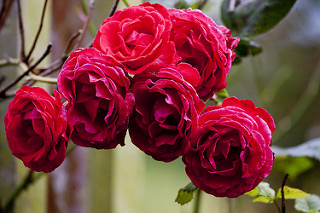

In [20]:
#  pil is a famous pillow 
PIL.Image.open(str(roses[1]))

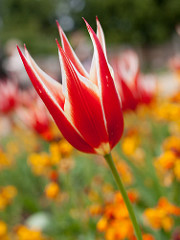

In [21]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [22]:
# dictionary of different flowers

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5398974188_799753449c.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4731069260_b270f47803_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4360743371_6238b36d8c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg')]

In [23]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/5398974188_799753449c.jpg')

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5398974188_799753449c.jpg'

In [ ]:
# we can use cv2 module to read this image file into openCV object
# into short of like a numpy array
image = cv2.imread(str(flowers_images_dict['roses'][0])) # in return it will give a numpy array

In [ ]:
image # opencv just read the image from the disk and converted into 3 dimensional numpy array

array([[[166, 186, 187],
        [166, 186, 191],
        [171, 189, 196],
        ...,
        [ 17,  24,  27],
        [ 17,  24,  27],
        [ 17,  24,  27]],

       [[157, 162, 165],
        [166, 196, 197],
        [153, 182, 186],
        ...,
        [ 16,  23,  26],
        [ 16,  23,  26],
        [ 17,  24,  27]],

       [[152, 181, 190],
        [163, 198, 201],
        [179, 201, 199],
        ...,
        [ 17,  24,  27],
        [ 16,  23,  26],
        [ 17,  24,  27]],

       ...,

       [[ 24,  30,  29],
        [ 25,  30,  29],
        [ 26,  31,  30],
        ...,
        [  8,  13,  12],
        [  7,  11,  12],
        [  6,  10,  11]],

       [[ 25,  30,  29],
        [ 27,  32,  31],
        [ 29,  31,  31],
        ...,
        [ 10,  12,  12],
        [  9,  11,  11],
        [  9,  11,  12]],

       [[ 24,  29,  28],
        [ 30,  32,  32],
        [ 30,  32,  32],
        ...,
        [  7,   9,  10],
        [  7,   9,   9],
        [  6,   8,   8]]

In [ ]:
image.shape

(333, 500, 3)

In [ ]:
cv2.resize(image,(180,180)).shape

(180, 180, 3)

In [24]:
X, y= [], []
for flower_name, images in flowers_images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [25]:
X, y= [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180)) 
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
flowers_labels_dict['roses']

0

In [ ]:
y[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [26]:
X = np.array(X)
y = np.array(y)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #default test_size 0.25

In [33]:
#preprocessing
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
num_classes= 5
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) # not specifying activation, so uses linear activation
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)    


Epoch 1/30
86/86 [==============================] - 63s 724ms/step - loss: 1.2797 - accuracy: 0.4571
Epoch 2/30
86/86 [==============================] - 61s 712ms/step - loss: 0.9312 - accuracy: 0.6355
Epoch 3/30
86/86 [==============================] - 61s 706ms/step - loss: 0.7092 - accuracy: 0.7380
Epoch 4/30
86/86 [==============================] - 65s 754ms/step - loss: 0.4924 - accuracy: 0.8136
Epoch 5/30
86/86 [==============================] - 63s 736ms/step - loss: 0.2870 - accuracy: 0.9015
Epoch 6/30
86/86 [==============================] - 61s 715ms/step - loss: 0.1638 - accuracy: 0.9459
Epoch 7/30
86/86 [==============================] - 64s 750ms/step - loss: 0.1031 - accuracy: 0.9713
Epoch 8/30
86/86 [==============================] - 64s 745ms/step - loss: 0.0775 - accuracy: 0.9786
Epoch 9/30
86/86 [==============================] - 69s 798ms/step - loss: 0.0508 - accuracy: 0.9884
Epoch 10/30
86/86 [==============================] - 65s 753ms/step - loss: 0.0291 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test) # so overfitting

29/29 [==============================] - 12s 429ms/step - loss: 2.8259 - accuracy: 0.6449


[2.8259494304656982, 0.6448801755905151]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 8s 263ms/step


array([[ -3.3371494 ,  10.542497  ,   6.3278127 , -10.847642  ,
         -4.108489  ],
       [  3.0018802 ,   3.8694742 ,   0.32548827,  -3.9057107 ,
          8.468129  ],
       [ -4.185945  ,  -0.27637678,  14.300688  ,   0.0919838 ,
          3.4494288 ],
       ...,
       [ -8.30641   ,  -8.487298  ,  10.490565  ,  14.574766  ,
          4.2455363 ],
       [ 13.345454  ,  -4.248524  ,  -5.5505376 ,  -1.6209862 ,
          7.5092535 ],
       [ -3.74929   , -10.2160425 ,   5.7809176 ,  18.377306  ,
          0.40733242]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0]) # converting the numpy into set of probability

In [ ]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.2421925e-07, 9.8543686e-01, 1.4561791e-02, 5.0583587e-10,
       4.2735277e-07], dtype=float32)>

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1

In [5]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

data_contrast = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.9),
  ]
)

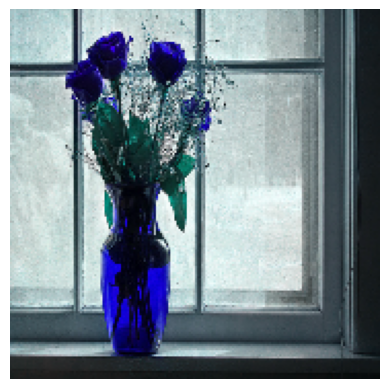

In [27]:
plt.axis('off')
plt.imshow(X[0])

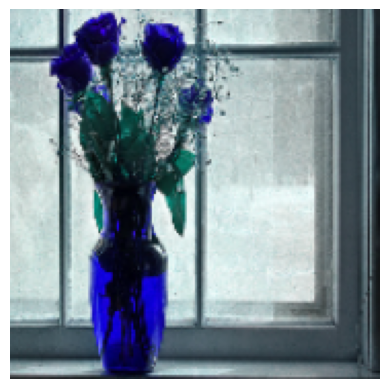

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

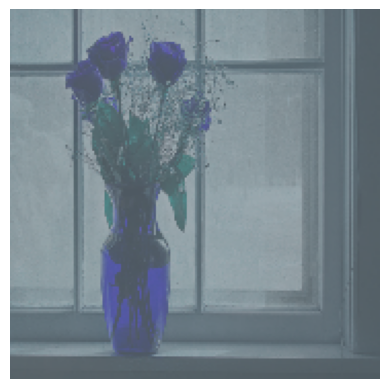

In [28]:
plt.axis('off')
plt.imshow(data_contrast(X)[0].numpy().astype("uint8"))

In [29]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [30]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.fit(X_train_scaled, y_train, epochs=30)   

Epoch 1/30
86/86 [==============================] - 72s 820ms/step - loss: 1.3479 - accuracy: 0.4128
Epoch 2/30
86/86 [==============================] - 70s 805ms/step - loss: 1.0316 - accuracy: 0.5883
Epoch 3/30
86/86 [==============================] - 70s 818ms/step - loss: 0.9473 - accuracy: 0.6279
Epoch 4/30
86/86 [==============================] - 72s 838ms/step - loss: 0.8622 - accuracy: 0.6642
Epoch 5/30
86/86 [==============================] - 76s 889ms/step - loss: 0.8084 - accuracy: 0.6875
Epoch 6/30
86/86 [==============================] - 71s 830ms/step - loss: 0.7666 - accuracy: 0.7133
Epoch 7/30
86/86 [==============================] - 71s 829ms/step - loss: 0.7285 - accuracy: 0.7148
Epoch 8/30
86/86 [==============================] - 71s 826ms/step - loss: 0.7183 - accuracy: 0.7282
Epoch 9/30
86/86 [==============================] - 70s 820ms/step - loss: 0.6557 - accuracy: 0.7442
Epoch 10/30
86/86 [==============================] - 70s 815ms/step - loss: 0.6387 - accura

In [35]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 221ms/step - loss: 0.9784 - accuracy: 0.7255


[0.9783525466918945, 0.7254902124404907]